# Import libraries

In [1]:
import pandas as pd
import re
import missingno as msn

import pymysql
from pymysql.err import MySQLError

# Load the dataset

In [2]:
# Import dataset
df = pd.read_csv("customer_churn.csv")
print("Shape of dataset:", df.shape,'\n')
df.head()

Shape of dataset: (6418, 32) 



,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# Explore the data

In [3]:
print("\nDataset Information:")
df.info()

# rename the columns to lowercase
print("\nColumn Names:")
df.columns = (df.columns.str.strip().str.lower().str.replace(" ", "_"))
print(df.columns.tolist())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   2870 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               5796 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                5028 non-null   object 
 12  Online_Security              5028 non-null   object 
 

# Checking and Replace null values

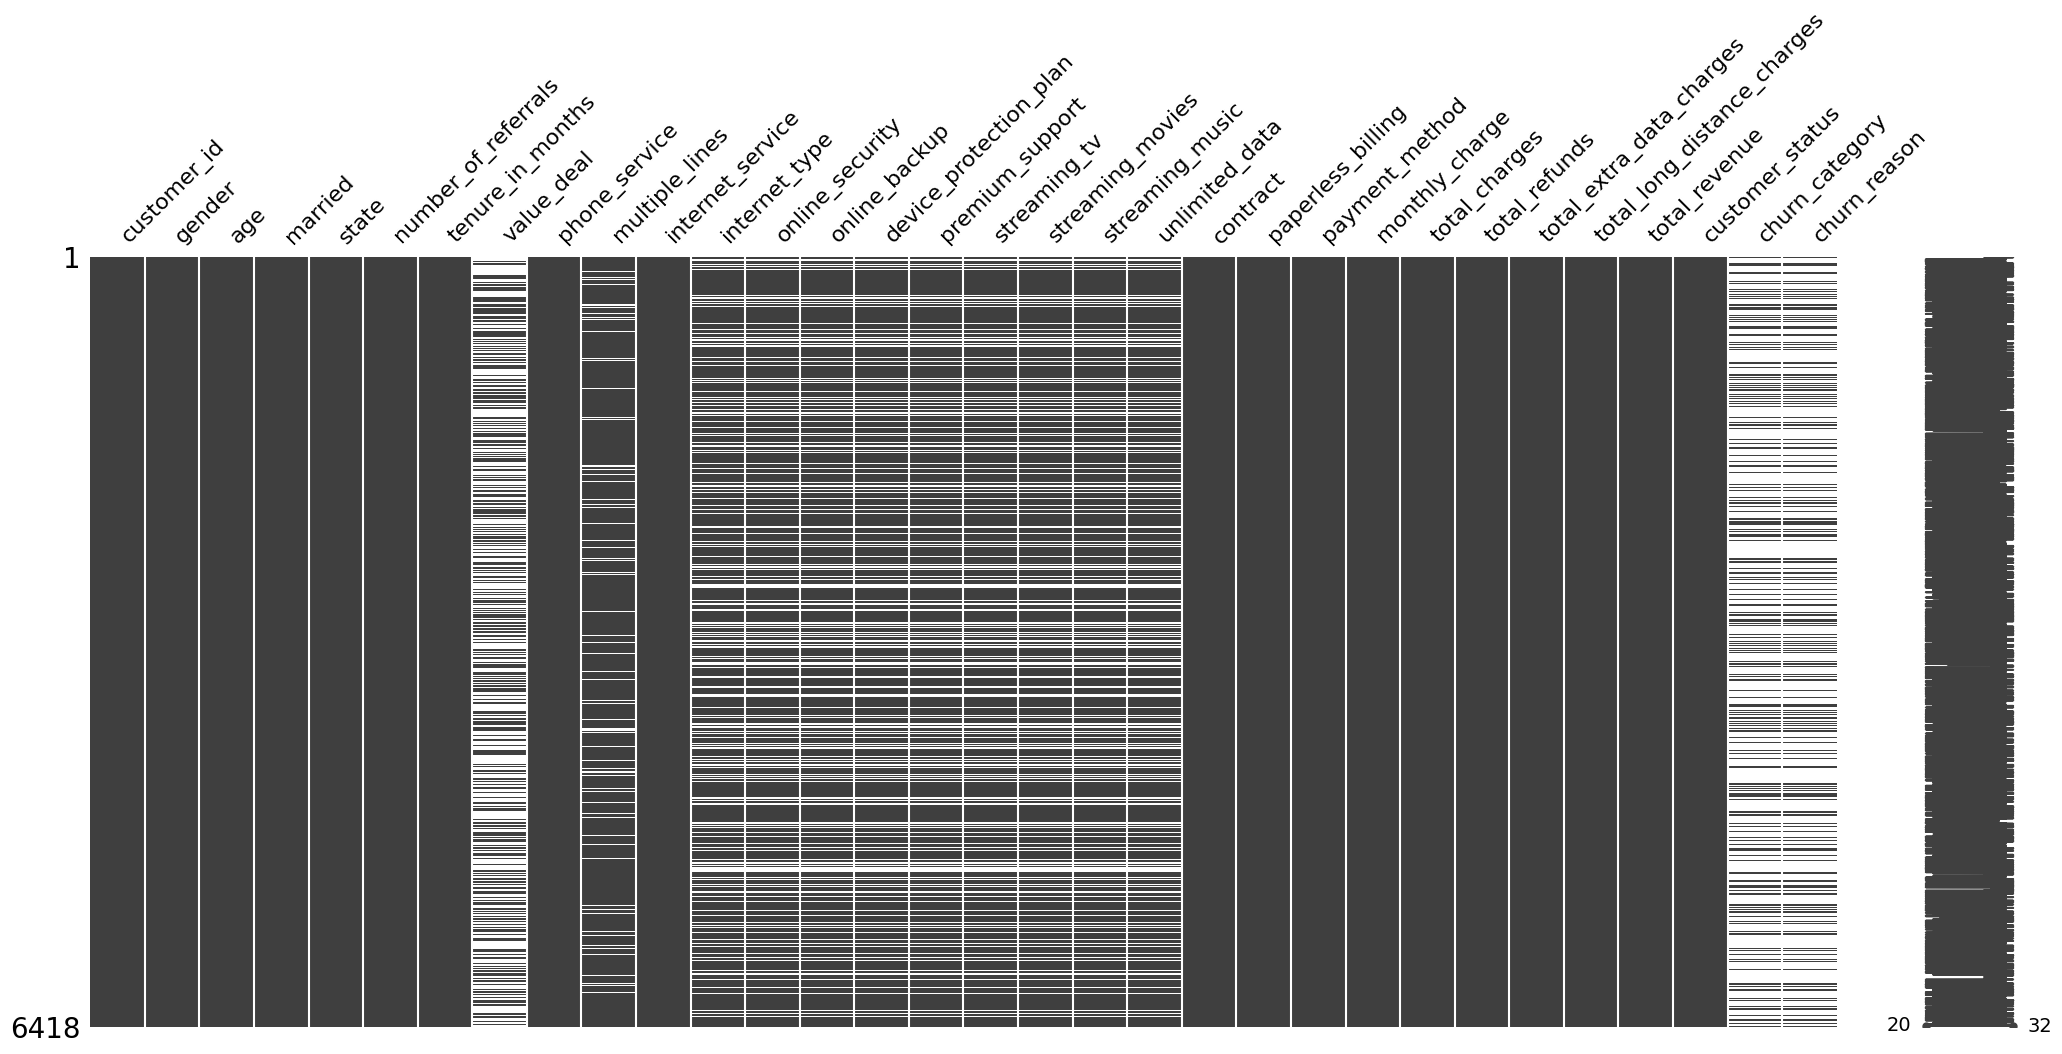

In [4]:
msn.matrix(df);

In [5]:
df['value_deal'] = df['value_deal'].fillna("None")
df['internet_type'] = df['internet_type'].fillna("None")

df['multiple_lines'] = df['multiple_lines'].fillna("No")
df['online_security'] = df['online_security'].fillna("No")
df['online_backup'] = df['online_backup'].fillna("No")
df['device_protection_plan'] = df['device_protection_plan'].fillna("No")
df['premium_support'] = df['premium_support'].fillna("No")
df['streaming_tv'] = df['streaming_tv'].fillna("No")
df['streaming_movies'] = df['streaming_movies'].fillna("No")
df['streaming_music'] = df['streaming_music'].fillna("No")
df['unlimited_data'] = df['unlimited_data'].fillna("No")
df['internet_type'] = df['internet_type'].fillna("No")

df['churn_category'] = df['churn_category'].fillna("Other")
df['churn_reason'] = df['churn_reason'].fillna("Other")

# Removing Dulipcates

In [6]:
duplicate_rows = df.duplicated()

# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

print("Shape of DataFrame Before Removing Duplicates: ", df.shape)

# Drop the duplicates
df = df.drop_duplicates()

# Checking the shape of the data after dropping duplicates
print("Shape of DataFrame After Removing Duplicates: ", df.shape)

Number of duplicate rows: 0
Shape of DataFrame Before Removing Duplicates:  (6418, 32)
Shape of DataFrame After Removing Duplicates:  (6418, 32)


# Export to csv

In [7]:
df.to_csv("churn.csv", index=False, encoding="utf-8")

# Load data to SQL

In [8]:
mydb = pymysql.connect(
    host="localhost",
    user="root",
    password="First@445",
)
print("Connected to Server")

cursor = mydb.cursor()

Connected to Server


In [9]:
try:
    cursor.execute("create database if not exists customer;")
    
    cursor.execute("use customer;")
    cursor.execute("""create table if not exists churn (  
                        customer_id varchar(20) primary key,
                        gender varchar(10),
                        age int,
                        married varchar(5),
                        state varchar(50),
                        number_of_referrals int,
                        tenure_in_months int,
                        value_deal varchar(50),
                        phone_service varchar(5),
                        multiple_lines varchar(5),
                        internet_service varchar(5),
                        internet_type varchar(20),
                        online_security varchar(5),
                        online_backup varchar(5),
                        device_protection_plan varchar(5),
                        premium_support varchar(5),
                        streaming_tv varchar(5),
                        streaming_movies varchar(5),
                        streaming_music varchar(5),
                        unlimited_data varchar(5),
                        contract varchar(20),
                        paperless_billing varchar(5),
                        payment_method varchar(50),
                        monthly_charge decimal(10,2),
                        total_charges decimal(10,2),
                        total_refunds decimal(10,2),
                        total_extra_data_charges decimal(10,2),
                        total_long_distance_charges decimal(10,2),
                        total_revenue decimal(10,2),
                        customer_status varchar(20),
                        churn_category varchar(50),
                        churn_reason varchar(100)
                     );   """)
    print("Connect to database")
except MySQLError as e:
    print("SQL error:", e)

Connect to database


In [10]:
try:
    insert_query = """
    INSERT INTO churn (
        customer_id, gender, age, married, state, number_of_referrals,
        tenure_in_months, value_deal, phone_service, multiple_lines,
        internet_service, internet_type, online_security, online_backup,
        device_protection_plan, premium_support, streaming_tv, streaming_movies,
        streaming_music, unlimited_data, contract, paperless_billing,
        payment_method, monthly_charge, total_charges, total_refunds,
        total_extra_data_charges, total_long_distance_charges, total_revenue,
        customer_status, churn_category, churn_reason
    )
    VALUES (
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
        %s, %s
    )
    """

    data = [tuple(row) for row in df.to_numpy()]
    
    cursor.executemany(insert_query, data)
    
    mydb.commit()
    print(f"{cursor.rowcount} rows inserted successfully!")

except MySQLError as e:
    print("SQL error:", e)


6418 rows inserted successfully!


In [11]:
if cursor:
    cursor.close()
if mydb:
    mydb.close()
print("Server Connection Closed")

Server Connection Closed
